<a href="https://colab.research.google.com/github/thekukieff/08.11/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Создаем расширенный датасет с шумом
np.random.seed(42)
data_noisy = {
    'район': ['Центр', 'ВИs', 'Уралмаш', 'Академический', 'Вторчрмет',
              'ЮГО-ЗАПАДНЫЙ', 'Эльмаш', 'ботанический', 'Центр', 'Академический', 'ВИЗ', 'Уралмаш'],
    'площадь': [44.8, 61.2, np.nan, 49.5, 56.7, 64.3, np.nan, 54.9, 46.2, np.nan, 57.6, 251.3],
    'цена_млн': [8.3, np.nan, 4.3, np.nan, 5.7, 6.6, 7.2, np.nan, 8.4, 7.3, 6.1, 25.2],
    'этаж': [5, 2, np.nan, 7, 3, 4, 3, 10, 5, 6, np.nan, 24],
    'комнат': [1, np.nan, 3, 1, 2, 3, 3, 2, np.nan, 2, 2, 99],
    'год_постройки': [2010, 1985, 1970, 2020, 1995, 2005, 1700, 2015, 2012, np.nan, 1990, 1800]
}

df = pd.DataFrame(data_noisy)
df

,район,площадь,цена_млн,этаж,комнат,год_постройки
0,Центр,44.8,8.3,5.0,1.0,2010.0
1,ВИs,61.2,NaN,2.0,NaN,1985.0
2,Уралмаш,NaN,4.3,NaN,3.0,1970.0
3,Академический,49.5,NaN,7.0,1.0,2020.0
4,Вторчрмет,56.7,5.7,3.0,2.0,1995.0
5,ЮГО-ЗАПАДНЫЙ,64.3,6.6,4.0,3.0,2005.0
6,Эльмаш,NaN,7.2,3.0,3.0,1700.0
7,ботанический,54.9,NaN,10.0,2.0,2015.0
8,Центр,46.2,8.4,5.0,NaN,2012.0
9,Академический,NaN,7.3,6.0,2.0,NaN


In [ ]:
# 1. Удаление пропусков
print("1. Удаление пропусков:")
print("Исходные пропуски:", df.isnull().sum())
df_dropna = df.dropna()
print("После удаления пропусков:", df_dropna.shape)

1. Удаление пропусков:
Исходные пропуски: район            0
площадь          3
цена_млн         3
этаж             2
комнат           2
год_постройки    1
dtype: int64
После удаления пропусков: (4, 6)


In [ ]:
df_dropna

,район,площадь,цена_млн,этаж,комнат,год_постройки
0,Центр,44.8,8.3,5.0,1.0,2010.0
4,Вторчрмет,56.7,5.7,3.0,2.0,1995.0
5,ЮГО-ЗАПАДНЫЙ,64.3,6.6,4.0,3.0,2005.0
11,Уралмаш,251.3,25.2,24.0,99.0,1800.0


In [ ]:
# 2. Заполнение пропусков

# Средним
df_mean = df.copy()
df_mean['площадь'] = df_mean['площадь'].fillna(df_mean['площадь'].mean())
print("Среднее:", df_mean['площадь'].mean())

Среднее: 76.27777777777779


In [ ]:
df_mean['площадь']

,площадь
0,44.800000
1,61.200000
2,76.277778
3,49.500000
4,56.700000
5,64.300000
6,76.277778
7,54.900000
8,46.200000
9,76.277778


In [ ]:
# Медианой
df_median = df.copy()
df_median['цена_млн'] = df_median['цена_млн'].fillna(df_median['цена_млн'].median())
print("Медиана:", df_median['цена_млн'].median())

Медиана: 7.2


In [ ]:
df_median['цена_млн']

,цена_млн
0,8.3
1,7.2
2,4.3
3,7.2
4,5.7
5,6.6
6,7.2
7,7.2
8,8.4
9,7.3


In [ ]:
# Модой
df_mode = df.copy()
df_mode['комнат'] = df_mode['комнат'].fillna(df_mode['комнат'].mode()[0])
print("Мода:", df_mode['комнат'].mode()[0])

Мода: 2.0


In [ ]:
df_mode['комнат']

,комнат
0,1.0
1,2.0
2,3.0
3,1.0
4,2.0
5,3.0
6,3.0
7,2.0
8,2.0
9,2.0


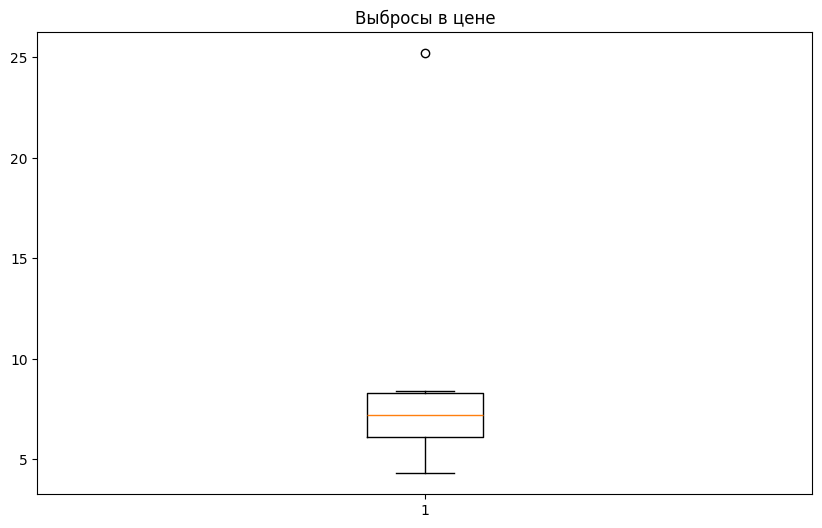

In [ ]:
# 3. Визуализация выбросов

plt.figure(figsize=(10, 6))
plt.boxplot(df['цена_млн'].dropna())
plt.title('Выбросы в цене')
plt.show()

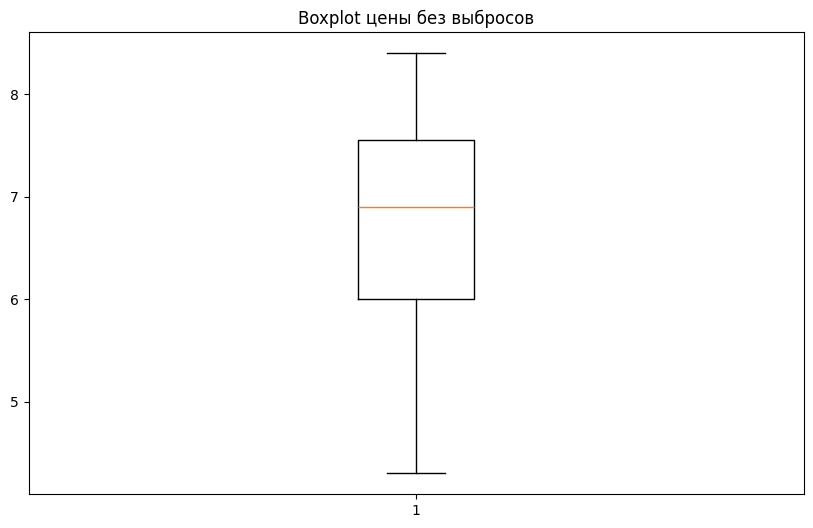

In [ ]:
# 4. Удаление выбросов

# Удаление выбросов с помощью IQR метода
Q1 = df['цена_млн'].quantile(0.25)
Q3 = df['цена_млн'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, удаляя выбросы
df_no_outliers = df[(df['цена_млн'] >= lower_bound) & (df['цена_млн'] <= upper_bound)]

# Строим boxplot без выбросов
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['цена_млн'].dropna())
plt.title('Boxplot цены без выбросов')
plt.show()

In [ ]:
# 5. Удаление дубликатов
print("\n6. Удаление дубликатов:")
print("Дубликаты до:", df.duplicated().sum())
df_nodup = df.drop_duplicates()
print("Дубликаты после:", df_nodup.duplicated().sum())


6. Удаление дубликатов:
Дубликаты до: 0
Дубликаты после: 0


In [ ]:
# 6. Кодирование категориальных переменных

# --- One-Hot Encoding ---
print("\nПример One-Hot Encoding для столбца 'район':")
df_onehot = pd.get_dummies(df, columns=['район'], prefix='район')
df_onehot.head()


Пример One-Hot Encoding для столбца 'район':


,площадь,цена_млн,этаж,комнат,год_постройки,район_Академический,район_ВИs,район_ВИЗ,район_Вторчрмет,район_Уралмаш,район_Центр,район_Эльмаш,район_ЮГО-ЗАПАДНЫЙ,район_ботанический
0,44.8,8.3,5.0,1.0,2010.0,False,False,False,False,False,True,False,False,False
1,61.2,NaN,2.0,NaN,1985.0,False,True,False,False,False,False,False,False,False
2,NaN,4.3,NaN,3.0,1970.0,False,False,False,False,True,False,False,False,False
3,49.5,NaN,7.0,1.0,2020.0,True,False,False,False,False,False,False,False,False
4,56.7,5.7,3.0,2.0,1995.0,False,False,False,True,False,False,False,False,False


In [ ]:
# --- Label Encoding ---
print("\nПример Label Encoding для столбца 'район':")
df_label = df.copy()
df_label['район_код'] = pd.factorize(df_label['район'])[0]
df_label[['район', 'район_код']].head()


Пример Label Encoding для столбца 'район':


,район,район_код
0,Центр,0
1,ВИs,1
2,Уралмаш,2
3,Академический,3
4,Вторчрмет,4


In [ ]:
# --- Target Encoding ---
print("\nПример Target Encoding для столбца 'район' относительно 'цена_млн':")
df_target = df.copy()
target_means = df.groupby('район')['цена_млн'].mean()
df_target['район_цена'] = df_target['район'].map(target_means)

df_target[['район', 'цена_млн', 'район_цена']].head()



Пример Target Encoding для столбца 'район' относительно 'цена_млн':


,район,цена_млн,район_цена
0,Центр,8.3,8.35
1,ВИs,NaN,NaN
2,Уралмаш,4.3,14.75
3,Академический,NaN,7.30
4,Вторчрмет,5.7,5.70


In [ ]:
print("Средние значения для Target Encoding: ")
print(target_means)

Средние значения для Target Encoding: 
район
Академический     7.30
ВИs                NaN
ВИЗ               6.10
Вторчрмет         5.70
Уралмаш          14.75
Центр             8.35
Эльмаш            7.20
ЮГО-ЗАПАДНЫЙ      6.60
ботанический       NaN
Name: цена_млн, dtype: float64


In [ ]:
# 7. Создание новых признаков
df_new = df.copy()
df_new['цена_за_квм'] = df_new['цена_млн'] / df_new['площадь']
df_new['возраст_дома'] = 2025 - df_new['год_постройки']
df_new['этаж_норм'] = df_new['этаж'] / 10

df_new.head()

,район,площадь,цена_млн,этаж,комнат,год_постройки,цена_за_квм,возраст_дома,этаж_норм
0,Центр,44.8,8.3,5.0,1.0,2010.0,0.185268,15.0,0.5
1,ВИs,61.2,NaN,2.0,NaN,1985.0,NaN,40.0,0.2
2,Уралмаш,NaN,4.3,NaN,3.0,1970.0,NaN,55.0,NaN
3,Академический,49.5,NaN,7.0,1.0,2020.0,NaN,5.0,0.7
4,Вторчрмет,56.7,5.7,3.0,2.0,1995.0,0.100529,30.0,0.3


# **Практическое задание:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Создаем dataset о продажах в продуктовом магазине
np.random.seed(42)
data_store = {
    'товар': ['Яблоки', 'Бананы', 'Молоко', 'Хлеб', 'Сыр', 'Яблоки', 'Йогурт', 'Колбаса',
              'Бананы', 'Сок', 'Молоко', 'Печенье', 'Хлеб', 'Сыр', 'Вода'],
    'категория': ['Фрукты', 'Фрукты', 'Молочные', 'Хлебные', 'Молочные', 'Фрукты',
                  'Молочные', 'Мясные', 'Фрукты', 'Напитки', 'Молочные', 'Сладости',
                  'Хлебные', 'Молочные', 'Напитки'],
    'цена': [80, 60, 75, 45, 320, 80, 55, 280, 60, 90, 75, 120, 45, 320, 40],
    'количество': [100, 150, 80, 120, 40, 100, 90, 35, 150, 70, 80, 60, 120, 40, 200],
    'продажи_неделя': [85, 140, 75, 110, 38, 95, 85, 32, 145, 65, 78, 55, 115, 42, 180],
    'скидка_%': [5, 0, 10, 5, 15, 5, 8, 20, 0, 0, 10, 12, 5, 15, 0],
    'поставщик': ['Ферма', 'Импорт', 'Молзавод', 'Пекарня', 'Сыроварня', 'Ферма',
                  'Молзавод', 'Мяскомб', 'Импорт', 'Завод', 'Молзавод', 'Кондитерская',
                  'Пекарня', 'Сыроварня', 'Завод']
}

df_store = pd.DataFrame(data_store)

df_store.loc[1, 'цена'] = np.nan
df_store.loc[4, 'количество'] = np.nan
df_store.loc[6, 'продажи_неделя'] = np.nan
df_store.loc[8, 'скидка_%'] = np.nan
df_store.loc[10, 'категория'] = np.nan
df_store.loc[12, 'поставщик'] = np.nan

df_store.loc[14, 'цена'] = 800
df_store.loc[7, 'продажи_неделя'] = 500

df_store = pd.concat([df_store, df_store.iloc[[0, 2, 5]]], ignore_index=True)

print("Датасет 'Продуктовый магазин':")
print(df_store)
print("\nИнформация о датасете:")
print(df_store.info())

Датасет 'Продуктовый магазин':
      товар категория   цена  количество  продажи_неделя  скидка_%  \
0    Яблоки    Фрукты   80.0       100.0            85.0       5.0   
1    Бананы    Фрукты    NaN       150.0           140.0       0.0   
2    Молоко  Молочные   75.0        80.0            75.0      10.0   
3      Хлеб   Хлебные   45.0       120.0           110.0       5.0   
4       Сыр  Молочные  320.0         NaN            38.0      15.0   
5    Яблоки    Фрукты   80.0       100.0            95.0       5.0   
6    Йогурт  Молочные   55.0        90.0             NaN       8.0   
7   Колбаса    Мясные  280.0        35.0           500.0      20.0   
8    Бананы    Фрукты   60.0       150.0           145.0       NaN   
9       Сок   Напитки   90.0        70.0            65.0       0.0   
10   Молоко       NaN   75.0        80.0            78.0      10.0   
11  Печенье  Сладости  120.0        60.0            55.0      12.0   
12     Хлеб   Хлебные   45.0       120.0           115.0   

In [21]:
# Задача: Найдите количество пропусков в каждом столбце

missing_data = df_store.isnull().sum()
print("Пропуски в данных:")
print(missing_data)

Пропуски в данных:
товар             0
категория         1
цена              1
количество        1
продажи_неделя    1
скидка_%          1
поставщик         1
dtype: int64


In [7]:
# Задача: Удалите все строки с пропусками

df_no_missing = df_store.dropna()
print("Размер после удаления пропусков:", df_no_missing.shape)
print("Оставшиеся пропуски:", df_no_missing.isnull().sum().sum())

Размер после удаления пропусков: (12, 7)
Оставшиеся пропуски: 0


In [10]:
# Задача 3.1: Заполните пропуски в цене средним значением
df_fill_mean = df_store.copy()

df_fill_mean['цена'] = df_fill_mean['цена'].fillna(df_fill_mean['цена'].mean())
print("Средняя цена:", df_fill_mean['цена'].mean())



# Задача 3.2: Заполните пропуски в количестве медианой
df_fill_median = df_store.copy()

df_fill_median['количество'] = df_fill_median['количество'].fillna(df_fill_median['количество'].median())
print("Медиана количества:", df_fill_median['количество'].median())

# Задача 3.3: Заполните пропуски в категории модой
df_fill_mode = df_store.copy()

df_fill_mode['категория'] = df_fill_mode['категория'].fillna(df_fill_mode['категория'].mode())
print("Мода категории:", df_fill_mode['категория'].mode()[0])

Средняя цена: 157.6470588235294
Медиана количества: 100.0
Мода категории: Фрукты


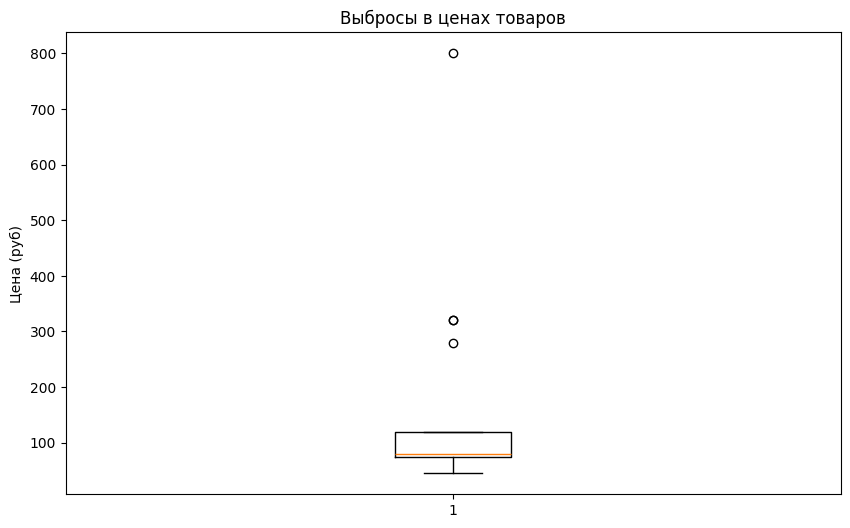

In [12]:
# Задача: Постройте boxplot для столбца "цена" чтобы найти выбросы
plt.figure(figsize=(10, 6))

plt.boxplot(df_store['цена'].dropna())


plt.title('Выбросы в ценах товаров')
plt.ylabel('Цена (руб)')
plt.show()

In [14]:
Q1 = df_store['цена'].quantile(0.25)
Q3 = df_store['цена'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_store[(df_store['цена'] >= lower_bound) & (df_store['цена'] <= upper_bound)]

print(f"Удалено выбросов: {len(df_store) - len(df_clean)}")

Удалено выбросов: 5


In [15]:
# Задача 6.1: Найдите количество дубликатов в данных

duplicates_count = df_store.duplicated().sum()
print("Количество дубликатов:", duplicates_count)

# Задача 6.2: Удалите дубликаты

df_no_duplicates = df_store.drop_duplicates()
print("Размер после удаления дубликатов:", df_no_duplicates.shape)

Количество дубликатов: 3
Размер после удаления дубликатов: (15, 7)


In [17]:
# Задача 7.1: One-Hot Encoding для столбца "категория"


df_onehot = pd.get_dummies(df_store, columns=['категория'], prefix='категория')
df_onehot.head()
print("Столбцы после One-Hot Encoding:")
print([col for col in df_onehot.columns if 'категория' in col])

# Задача 7.2: Label Encoding для столбца "поставщик"



df_label = df_store.copy()

df_label['поставщик_код'] = pd.factorize(df_label['поставщик'])[0]
print("Label Encoding поставщиков:")
print(df_label[['поставщик', 'поставщик_код']].head())

Столбцы после One-Hot Encoding:
['категория_Молочные', 'категория_Мясные', 'категория_Напитки', 'категория_Сладости', 'категория_Фрукты', 'категория_Хлебные']
Label Encoding поставщиков:
   поставщик  поставщик_код
0      Ферма              0
1     Импорт              1
2   Молзавод              2
3    Пекарня              3
4  Сыроварня              4


In [19]:

# Задача 8.1: Создайте признак "выручка" = цена * продажи_неделя
df_new_features = df_store.copy()

df_new_features['выручка'] = df_store['цена']*df_store['продажи_неделя']
print("Средняя выручка:", df_new_features['выручка'].mean())

# Задача 8.2: Создайте признак "остаток_товара" = количество - продажи_неделя

df_new_features['остаток_товара'] = df_store['количество'] - df_store['продажи_неделя']
print("Средний остаток товара:", df_new_features['остаток_товара'].mean())

# Задача 8.3: Создайте признак "цена_со_скидкой" = цена * (1 - скидка_%/100)

df_new_features['цена_со_скидкой'] = df_store['цена']*(1 - df_store['скидка_%'])
print("Средняя цена со скидкой:", df_new_features['цена_со_скидкой'].mean())

Средняя выручка: 24173.4375
Средний остаток товара: -22.1875
Средняя цена со скидкой: -1172.5


In [20]:
# Визуализация итогового набора данных
df_new_features.head()


,товар,категория,цена,количество,продажи_неделя,скидка_%,поставщик,выручка,остаток_товара,цена_со_скидкой
0,Яблоки,Фрукты,80.0,100.0,85.0,5.0,Ферма,6800.0,15.0,-320.0
1,Бананы,Фрукты,NaN,150.0,140.0,0.0,Импорт,NaN,10.0,NaN
2,Молоко,Молочные,75.0,80.0,75.0,10.0,Молзавод,5625.0,5.0,-675.0
3,Хлеб,Хлебные,45.0,120.0,110.0,5.0,Пекарня,4950.0,10.0,-180.0
4,Сыр,Молочные,320.0,NaN,38.0,15.0,Сыроварня,12160.0,NaN,-4480.0
